In [1]:
#libraries

import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np 
from scipy.stats import chi2_contingency
from scipy.stats.contingency import association

#### Pourcentage de drop à chaque étape du funnel


Taux d’abandon (%) entre les étapes du funnel.

Taux de conversion globale (%) du funnel.

In [4]:
file = r"..\data\clean\clean_Aurelie\clean_df_all_with_dates_and_time.csv"
#file_test = r"..\data\clean\cleaned_df_all_by_Test.csv"
#file_control = r"..\data\clean\cleaned_df_all_by_Control.csv"

df_all = pd.read_csv(file)
#df_test = pd.read_csv(file_test)
#df_control =  pd.read_csv(file_control)



print("all columns",df_all.info())

#nombre de user sur chaque step

#df_all["process_step"].value_counts()
"""
process_step
start      104041
step_1      68410
step_2      56855
step_3      48675
confirm     43214
Name: count, dtype: int64 
"""

#cross tab des variations par step 

crosstab_all = pd.crosstab(df_all["process_step"],df_all["Variation"])

crosstab_all

""" 
Variation	Control	Test
process_step		
confirm	17498	25716
start	47589	56452
step_1	29657	38753
step_2	25877	30978
step_3	22787	25888
"""

#data from the crosstab reorganized 
steps = ['start', 'step_1', 'step_2', 'step_3', 'confirm']  


control_counts = [47589, 29657, 25877, 22787, 17498]
test_counts = [56452, 38753, 30978, 25888, 25716]


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 321195 entries, 0 to 321194
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         321195 non-null  int64  
 1   visitor_id        321195 non-null  object 
 2   visit_id          321195 non-null  object 
 3   process_step      321195 non-null  object 
 4   Variation         321195 non-null  object 
 5   clnt_tenure_yr    321195 non-null  float64
 6   clnt_tenure_mnth  321195 non-null  float64
 7   clnt_age          321195 non-null  float64
 8   gendr             321195 non-null  object 
 9   num_accts         321195 non-null  float64
 10  bal               321195 non-null  float64
 11  calls_6_mnth      321195 non-null  float64
 12  logons_6_mnth     321195 non-null  float64
 13  date              321195 non-null  object 
 14  time              321195 non-null  object 
dtypes: float64(7), int64(1), object(7)
memory usage: 36.8+ MB
all column

In [4]:
print(df_test.shape)
print(df_control.shape)

print(df_all.shape)

(177787, 15)
(143408, 15)
(321195, 15)


In [42]:
#percentage per step -> Completion Rate

control_start = control_counts[0]
test_start = test_counts[0]

control_percentages = [count / control_start * 100 for count in control_counts]
test_percentages = [count / test_start * 100 for count in test_counts]

print("Control :", control_percentages)
print("Test :", test_percentages)

Control : [100.0, 62.31902330370463, 54.37601126310702, 47.88291411880897, 36.7690012397823]
Test : [100.0, 68.6477007014809, 54.874938000425146, 45.858428399348114, 45.553744774321544]


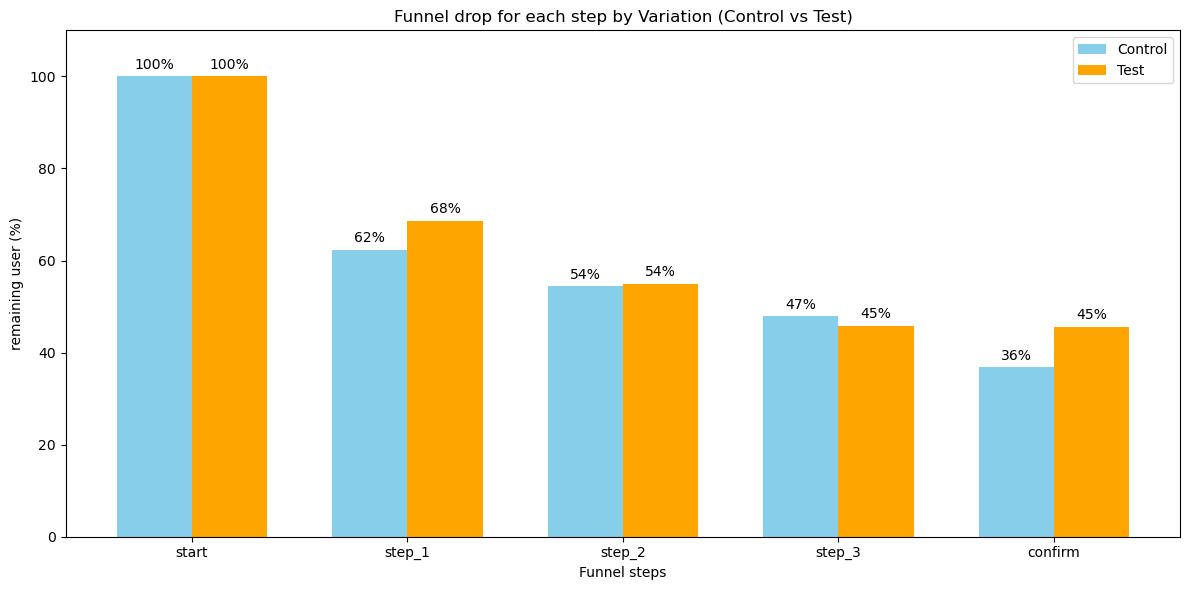

In [43]:
#dataviz
x = np.arange(len(steps))  
bar_width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))


# size and personalization 
ax.bar(x - bar_width / 2, control_percentages, bar_width, label='Control', color='skyblue')
ax.bar(x + bar_width / 2, test_percentages, bar_width, label='Test', color='orange')

# add percentage to barplot
for i, (c_perc, t_perc) in enumerate(zip(control_percentages, test_percentages)):
    ax.text(i - bar_width / 2, c_perc + 1, f"{int(c_perc)}%", ha='center', va='bottom')
    ax.text(i + bar_width / 2, t_perc + 1, f"{int(t_perc)}%", ha='center', va='bottom')


ax.set_xticks(x)
ax.set_xticklabels(steps)
ax.set_xlabel('Funnel steps')
ax.set_ylabel('remaining user (%)')
ax.set_ylim(0, 110)  
ax.set_title('Funnel drop for each step by Variation (Control vs Test)')
ax.legend()

plt.tight_layout()
plt.show()

Conclusion: The influence of the previous installment of the funnel on the control user

completion rate: 
 
 - Test: 45%
 - Control : 36%

In [ ]:
#Drop-out Rate

control_dropout_rates = []
for i in range(1, len(control_counts)):
    rate = ((control_counts[i-1] - control_counts[i]) / control_counts[i-1]) * 100
    control_dropout_rates.append(rate)


test_dropout_rates = []
for i in range(1, len(test_counts)):
    rate = ((test_counts[i-1] - test_counts[i]) / test_counts[i-1]) * 100
    test_dropout_rates.append(rate)


steps_dropout = steps[1:]  


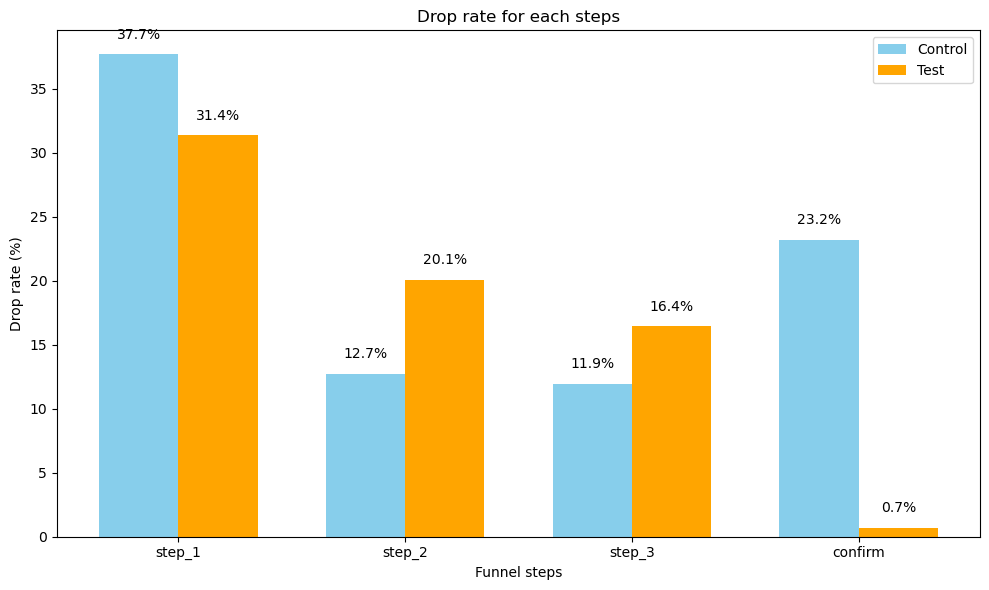

In [46]:
# dataviz
x = np.arange(len(steps_dropout)) 
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))


ax.bar(x - bar_width / 2, control_dropout_rates, bar_width, label='Control', color='skyblue')
ax.bar(x + bar_width / 2, test_dropout_rates, bar_width, label='Test', color='orange')


for i, (c_rate, t_rate) in enumerate(zip(control_dropout_rates, test_dropout_rates)):
    ax.text(i - bar_width / 2, c_rate + 1, f"{c_rate:.1f}%", ha='center', va='bottom')
    ax.text(i + bar_width / 2, t_rate + 1, f"{t_rate:.1f}%", ha='center', va='bottom')


ax.set_xticks(x)
ax.set_xticklabels(steps_dropout)
ax.set_xlabel('Funnel steps')
ax.set_ylabel('Drop rate (%)')
ax.set_title('Drop rate for each steps')
ax.legend()

plt.tight_layout()
plt.show()

Conclusion : 

The visualization highlights the dropout rates at each step of the funnel for both the Control and Test groups. Key observations include:

Step 1 has the highest dropout rate for both groups, with 37.7% in Control and 31.4% in Test, indicating significant user loss at the initial stage.

The Test group consistently outperforms the Control group, showing lower dropout rates across all steps, particularly at Step 2 (12.7% vs. 20.1%) and Step 3 (11.9% vs. 16.4%).

The confirm step has almost negligible dropout for both groups, indicating that users who reach this stage are very likely to complete the process.

This suggests that the Test variation improves user retention, particularly in the later steps of the funnel. However, the high dropout at Step 1 should be a priority for optimization.

In [47]:
# Time Spent per Step

#### Nombre de sessions nécessaires pour atteindre la conversion (confirm)

Nombre moyen de sessions par utilisateur avant la conversion.

Distribution des sessions (médiane, percentiles).

In [ ]:
#completion rate
# Step 1: Filter data for users who reached "confirm"
df_confirm = df_all[df_all["process_step"] == "confirm"]

sessions_per_user = df_all.groupby("client_id")["visit_id"].nunique().reset_index()
sessions_per_user.columns = ["client_id", "session_count"]

df_variation = df_confirm[["client_id", "Variation"]].drop_duplicates()
sessions_per_user = sessions_per_user.merge(df_variation, on="client_id")

stats = sessions_per_user.groupby("Variation")["session_count"].describe()

print(stats)



             count      mean       std  min  25%  50%  75%   max
Variation                                                       
Control    15428.0  1.406469  0.879166  1.0  1.0  1.0  2.0  18.0
Test       18682.0  1.414303  0.859092  1.0  1.0  1.0  2.0  14.0


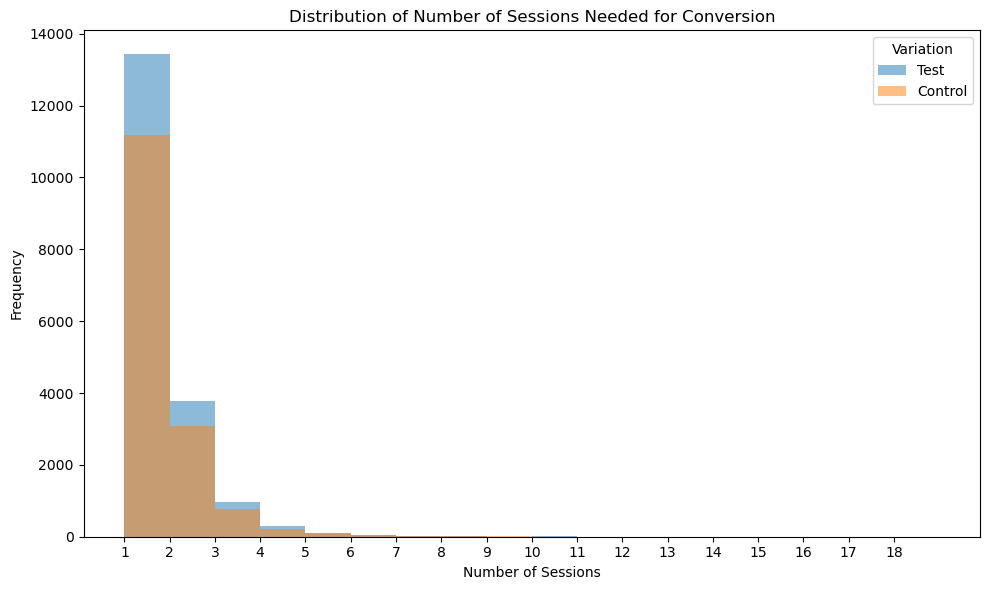

In [49]:
plt.figure(figsize=(10, 6))

for variation in sessions_per_user["Variation"].unique():
    subset = sessions_per_user[sessions_per_user["Variation"] == variation]
    plt.hist(subset["session_count"], bins=range(1, subset["session_count"].max() + 2), 
             alpha=0.5, label=variation)

plt.title("Distribution of Number of Sessions Needed for Conversion")
plt.xlabel("Number of Sessions")
plt.ylabel("Frequency")
plt.legend(title="Variation")
plt.xticks(range(1, sessions_per_user["session_count"].max() + 1))
plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_8280\964781452.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2")


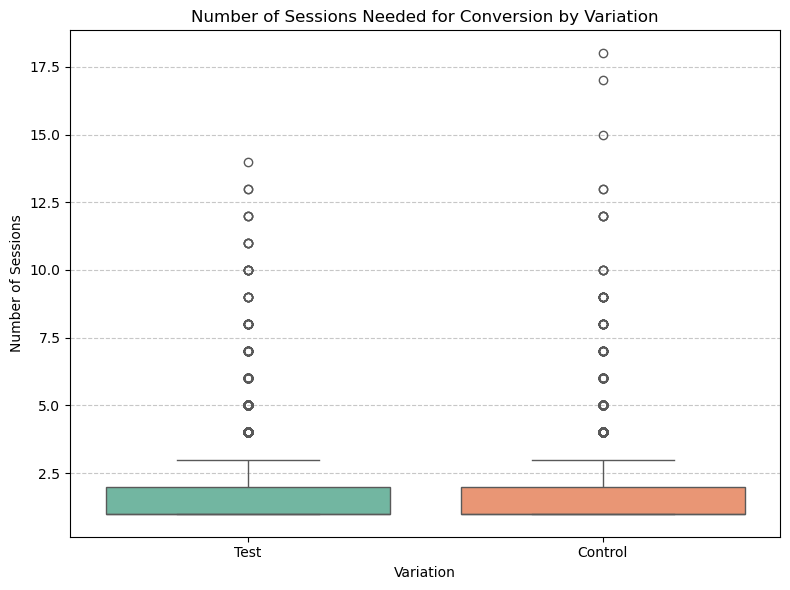

In [ ]:

sessions_per_user["Variation"] = sessions_per_user["Variation"].replace({"Control": "Control", "Test": "Test"}) 
plt.figure(figsize=(8, 6))

sns.boxplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2")

plt.title("Number of Sessions Needed for Conversion by Variation")
plt.xlabel("Variation")
plt.ylabel("Number of Sessions")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\aurel\AppData\Local\Temp\ipykernel_8280\1586418212.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2", inner="quartile")


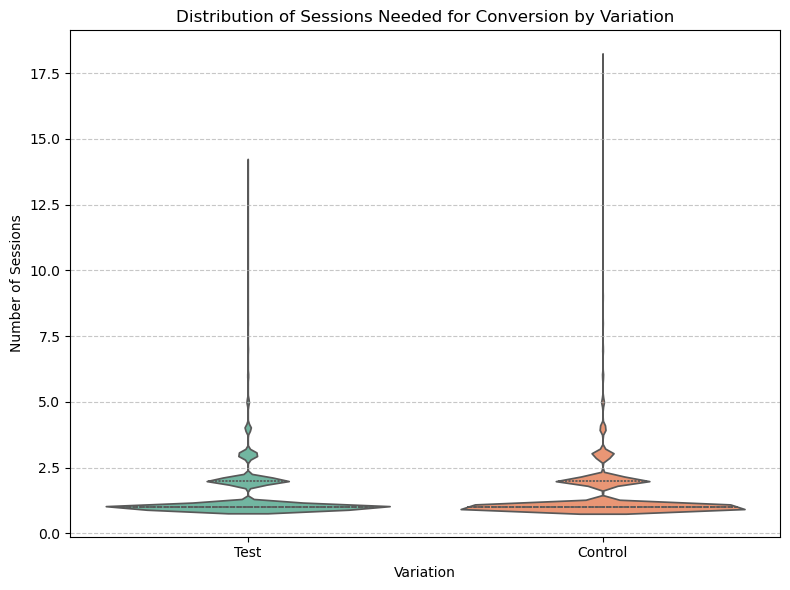

In [ ]:
plt.figure(figsize=(8, 6))

sns.violinplot(data=sessions_per_user, x="Variation", y="session_count", palette="Set2", inner="quartile")

plt.title("Distribution of Sessions Needed for Conversion by Variation")
plt.xlabel("Variation")
plt.ylabel("Number of Sessions")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.tight_layout()
plt.show()

Completion rate 

conclusion

15,428 users in the control group converted.
18,682 users in the test group converted.
This suggests that, in terms of total conversions, the Test group performed better than the Control group.

Average Number of Sessions Needed:

Users in the Control group needed 1.41 sessions on average to convert.
Likewise, 1.41 sessions were needed by users in the Test group.
There is no discernible improvement in the number of sessions required for conversion between the two groups, indicating a negligible difference.



#### Temps passé par étape 

durée passée par les clients à chaque étape, 
aidant à identifier les points de friction potentiels.

In [14]:
from datetime import time, timedelta 
df_all['date_time'] = pd.to_datetime(df_all['date'] + ' ' + df_all['time'])
df_all = df_all.sort_values(by=['client_id', 'date_time'])

df_all['time_diff'] = df_all.groupby('client_id')['date_time'].diff()

df_all = df_all[df_all['time_diff'].notnull()]
time_spent = df_all.groupby(['process_step', 'Variation'])['time_diff'].mean().reset_index()


time_spent['time_diff_seconds'] = time_spent['time_diff'].dt.total_seconds()

print(time_spent)


  process_step Variation                 time_diff  time_diff_seconds
0      confirm   Control 1 days 08:13:57.598533455      116037.598533
1      confirm      Test 1 days 20:05:03.530578398      158703.530578
2        start   Control 2 days 21:45:28.448824804      251128.448825
3        start      Test 3 days 07:20:54.850714749      285654.850715
4       step_1   Control 0 days 01:07:13.321130952        4033.321131
5       step_1      Test 0 days 00:45:04.047563559        2704.047564
6       step_2   Control 0 days 00:00:35.200455580          35.200456
7       step_2      Test 0 days 00:02:23.097382431         143.097382
8       step_3   Control 0 days 00:18:54.133174044        1134.133174
9       step_3      Test 0 days 00:19:54.356901054        1194.356901


C:\Users\aurel\AppData\Local\Temp\ipykernel_18772\2145597194.py:2: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_all['date_time'] = pd.to_datetime(df_all['date'] + ' ' + df_all['time'])


In [16]:
for i in range(1, df_all.shape[0]):
    if df_all.loc[i-1, 'visit_id'] == df_all.loc[i, 'visit_id']:
        df_all.loc[i, 'time_delta'] = df_all.loc[i, 'date_time'] - df_all.loc[i-1, 'date_time']
    else:
        df_all.loc[i, 'time_delta'] = None

KeyError: 8

In [26]:
# Parse dates correctly
df_all['date_time'] = pd.to_datetime(df_all['date'] + ' ' + df_all['time'], dayfirst=True)

df_all['time_diff_seconds'] = df_all['time_diff'].dt.total_seconds()
df_all = df_all[(df_all['time_diff_seconds'] > 0) & (df_all['time_diff_seconds'] < 86400)]  

time_spent = df_all.groupby(['process_step', 'Variation'])['time_diff_seconds'].median().reset_index()
time_spent['time_diff_minutes'] = time_spent['time_diff_seconds'] / 60

print(time_spent)

  process_step Variation  time_diff_seconds  time_diff_minutes
0      confirm   Control               72.0           1.200000
1      confirm      Test               71.0           1.183333
2        start   Control               53.0           0.883333
3        start      Test               57.0           0.950000
4       step_1   Control               11.0           0.183333
5       step_1      Test                9.5           0.158333
6       step_2   Control               15.0           0.250000
7       step_2      Test               21.0           0.350000
8       step_3   Control               42.0           0.700000
9       step_3      Test               58.0           0.966667


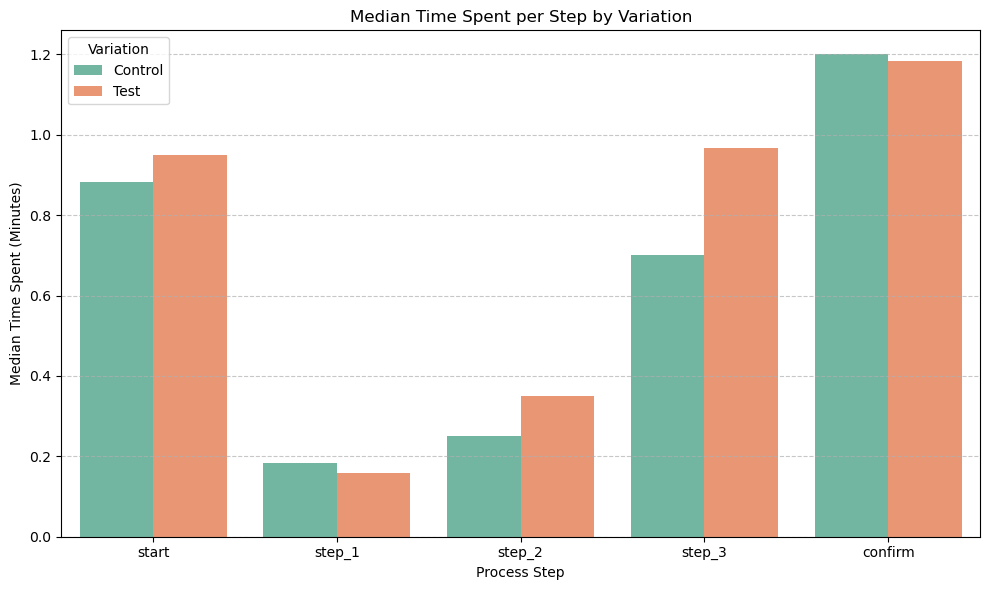

In [27]:
# Bar chart for median time spent per step
plt.figure(figsize=(10, 6))
sns.barplot(data=time_spent, x='process_step', y='time_diff_minutes', order=["start","step_1","step_2","step_3", "confirm"], hue='Variation', palette='Set2')

# Customize the chart
plt.title("Median Time Spent per Step by Variation")
plt.xlabel("Process Step")
plt.ylabel("Median Time Spent (Minutes)")
plt.legend(title="Variation")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

detection d'erreur sur les étapes 



In [ ]:
# not good
step_order = {'start': 1, 'step_1': 2, 'step_2': 3, 'step_3': 4, 'confirm': 5}
df_all['step_order'] = df_all['process_step'].map(step_order)

df_all['error'] = df_all.groupby('client_id')['step_order'].diff() < 0


error_rates = df_all[df_all['error'] == True].groupby(['process_step', 'Variation'])['client_id'].nunique()
total_users = df_all.groupby(['process_step', 'Variation'])['client_id'].nunique()

error_rate_percentage = (error_rates / total_users * 100).reset_index()
error_rate_percentage.columns = ['process_step', 'Variation', 'error_rate_percentage']

print(error_rate_percentage)

  process_step Variation  error_rate_percentage
0      confirm   Control                    NaN
1      confirm      Test                    NaN
2        start   Control              85.678252
3        start      Test              90.653119
4       step_1   Control              92.360766
5       step_1      Test              91.562242
6       step_2   Control              92.490882
7       step_2      Test              92.926479
8       step_3   Control              86.765044
9       step_3      Test              87.301207


In [ ]:
#worst
df_all['error'] = (df_all.groupby('client_id')['step_order'].diff() < 0) & (df_all.groupby('client_id')['step_order'].diff().abs() > 1)

df_all['error'] = df_all.groupby(['client_id', 'visit_id'])['step_order'].diff() < 0

df_all['error'] = df_all.groupby(['client_id', 'visit_id'])['step_order'].diff() < 0


valid_backwards = {3: 2, 2: 1}  #enleve confirm

df_all['error'] = ~df_all.groupby('client_id')['step_order'].diff().isin(valid_backwards.values())
error_rates = df_all[df_all['error']].groupby(['process_step', 'Variation'])['client_id'].nunique()


total_users = df_all.groupby(['process_step', 'Variation'])['client_id'].nunique()

error_rate_percentage = (error_rates / total_users * 100).reset_index()
error_rate_percentage.columns = ['process_step', 'Variation', 'error_rate_percentage']

print(error_rate_percentage)


  process_step Variation  error_rate_percentage
0      confirm   Control              99.358310
1      confirm      Test              99.844770
2        start   Control             100.000000
3        start      Test             100.000000
4       step_1   Control              98.024422
5       step_1      Test              96.702391
6       step_2   Control              96.915898
7       step_2      Test              95.861046
8       step_3   Control              98.977951
9       step_3      Test              98.491090


In [ ]:

sample_users = df_all['client_id'].sample(5)
for user in sample_users:
    print(df_all[df_all['client_id'] == user][['visit_id', 'process_step', 'step_order']])



                           visit_id process_step  step_order
98214  937563787_28906008871_284250        start           1
98323  452400098_91589381081_693805        start           1
98322  452400098_91589381081_693805       step_1           2
98321  452400098_91589381081_693805       step_2           3
98320  452400098_91589381081_693805       step_3           4
98319  452400098_91589381081_693805      confirm           5
                            visit_id process_step  step_order
183635  632356080_74409044311_622388       step_3           4
183634  632356080_74409044311_622388      confirm           5
                          visit_id process_step  step_order
215440  9690122_82910244536_754539      confirm           5
                            visit_id process_step  step_order
226756  485153498_16933903643_852874        start           1
226755  485153498_16933903643_852874       step_1           2
226754  485153498_16933903643_852874       step_2           3
226753  485153498_1

In [ ]:

df_all['prev_step'] = df_all.groupby(['client_id', 'visit_id'])['process_step'].shift(1)
transitions = df_all.groupby(['prev_step', 'process_step']).size().reset_index(name='count')
print(transitions.sort_values(by='count', ascending=False))


   prev_step process_step  count
20    step_3      confirm  11396
19    step_2       step_3  10908
13    step_1       step_2   8925
7      start       step_1   8637
6      start        start   8522
0    confirm      confirm   3733
11    step_1        start   3145
23    step_3       step_2   2299
17    step_2       step_1   2126
21    step_3        start   1375
12    step_1       step_1   1224
24    step_3       step_3   1187
16    step_2        start    798
18    step_2       step_2    632
9      start       step_3    359
22    step_3       step_1    358
1    confirm        start    319
8      start       step_2    272
4    confirm       step_3    125
2    confirm       step_1     79
14    step_1       step_3     27
15    step_2      confirm     27
5      start      confirm     24
10    step_1      confirm      7
3    confirm       step_2      1


In [ ]:
valid_transitions = {
    'start': ['step_1'],
    'step_1': ['step_2'],
    'step_2': ['step_3'],
    'step_3': ['confirm']
}

df_all['prev_step'] = df_all.groupby(['client_id', 'visit_id'])['process_step'].shift(1)
df_all['is_error'] = ~df_all.apply(lambda row: row['process_step'] in valid_transitions.get(row['prev_step'], []), axis=1)

error_counts = df_all[df_all['is_error']].groupby(['process_step', 'Variation'])['client_id'].nunique()
total_users = df_all.groupby(['process_step', 'Variation'])['client_id'].nunique()
error_rate_percentage = (error_counts / total_users * 100).reset_index()
error_rate_percentage.columns = ['process_step', 'Variation', 'error_rate_percentage']

print(error_rate_percentage)



  process_step Variation  error_rate_percentage
0      confirm   Control              38.601360
1      confirm      Test              48.483930
2        start   Control             100.000000
3        start      Test             100.000000
4       step_1   Control              51.942446
5       step_1      Test              62.471483
6       step_2   Control              52.046784
7       step_2      Test              46.144279
8       step_3   Control              47.897846
9       step_3      Test              46.552839


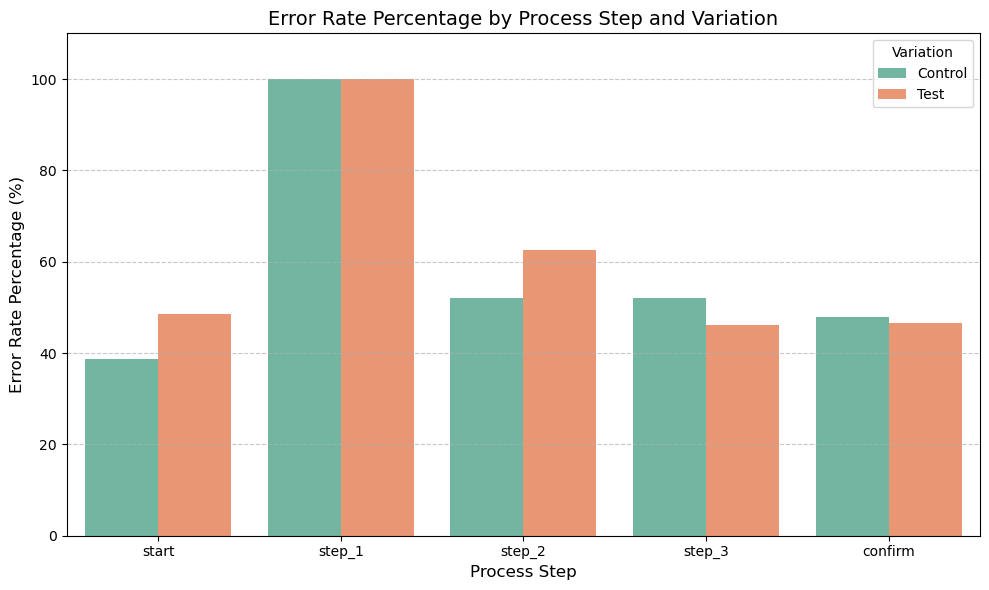

In [31]:
data = {
    "process_step": ["start", "start", "step_1", "step_1", "step_2", "step_2", "step_3", "step_3","confirm", "confirm"],
    "Variation": ["Control", "Test", "Control", "Test", "Control", "Test", "Control", "Test", "Control", "Test"],
    "error_rate_percentage": [38.601360, 48.483930, 100.000000, 100.000000, 51.942446, 62.471483, 52.046784, 46.144279, 47.897846, 46.552839],
}
df = pd.DataFrame(data)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="process_step",
    y="error_rate_percentage",

    hue="Variation",
    palette="Set2",
)

# Chart Customizations
plt.title("Error Rate Percentage by Process Step and Variation", fontsize=14)
plt.xlabel("Process Step", fontsize=12)
plt.ylabel("Error Rate Percentage (%)", fontsize=12)
plt.ylim(0, 110)  # Set the y-axis limit for clarity
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend(title="Variation")

# Show Plot
plt.tight_layout()
plt.show()

In [6]:
#engamenet des client sur la durée
df_all['date'] = pd.to_datetime(df_all['date'], dayfirst=True)

df_all = df_all.sort_values(by=['client_id', 'date'])
first_visits = df_all.groupby('client_id')['date'].first().reset_index()
subsequent_visits = df_all.merge(first_visits, on='client_id', suffixes=('', '_first'))

subsequent_visits['days_since_first'] = (subsequent_visits['date'] - subsequent_visits['date_first']).dt.days

return_7_days = subsequent_visits[subsequent_visits['days_since_first'] <= 7]['client_id'].nunique() / first_visits['client_id'].nunique() * 100
return_30_days = subsequent_visits[subsequent_visits['days_since_first'] <= 30]['client_id'].nunique() / first_visits['client_id'].nunique() * 100

return_7_days, return_30_days


(100.0, 100.0)

In [7]:
experiment_start_date = pd.to_datetime("01/05/2017", dayfirst=True)
df_all['period'] = df_all['date'].apply(lambda x: 'pre' if x < experiment_start_date else 'post')

logons_summary = df_all.groupby(['period', 'Variation'])['logons_6_mnth'].mean().reset_index()
logons_summary

,period,Variation,logons_6_mnth
0,post,Control,6.569649
1,post,Test,6.436651
2,pre,Control,6.205103
3,pre,Test,6.193435


Colonnes de df_all : ['client_id', 'visitor_id', 'visit_id', 'process_step', 'Variation', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'clnt_age', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth', 'date', 'time', 'period', 'age_group']

Répartition des tranches d'âge :
age_group
51-61    81536
17-34    81035
35-50    80387
62-96    78237
Name: count, dtype: int64

Nombre de valeurs NaN dans 'age_group' : 0

Tableau Croisé (crosstab_age) :
process_step         confirm  start  step_1  step_2  step_3
age_group Variation                                        
17-34     Control       4597  11596    7564    6991    6062
          Test          6840  13614    9706    7624    6441
35-50     Control       4570  11944    7556    6693    5726
          Test          6512  13980    9470    7603    6333
51-61     Control       4397  12029    7346    6527    5734

Pourcentages de Réussite dans le Funnel :
process_step         confirm  start  step_1  step_2  step_3
age_group Variation          

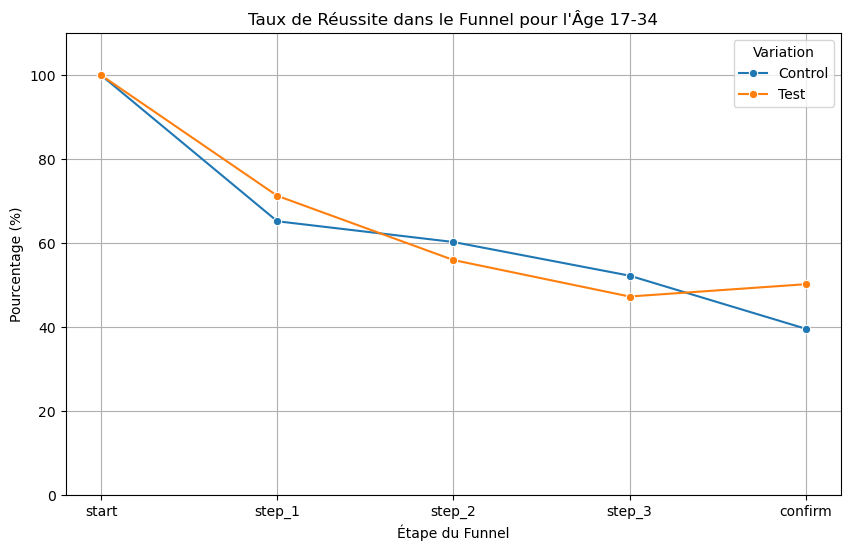

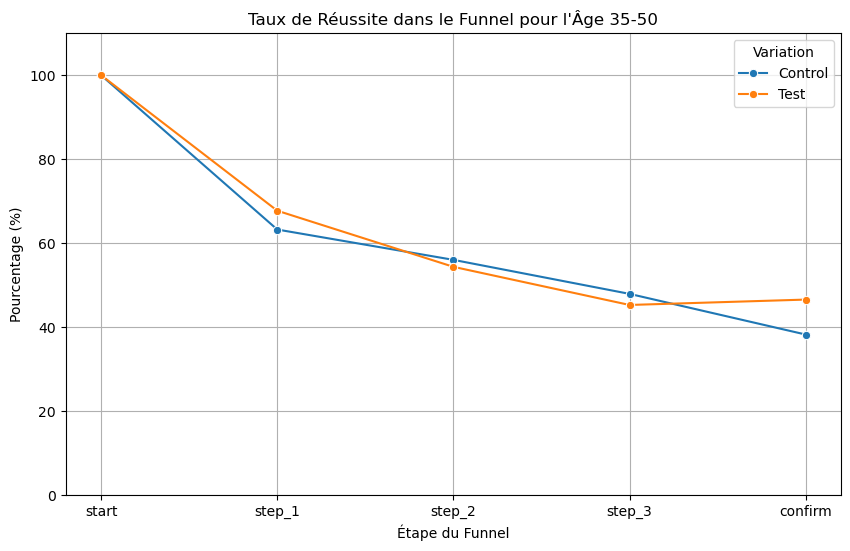

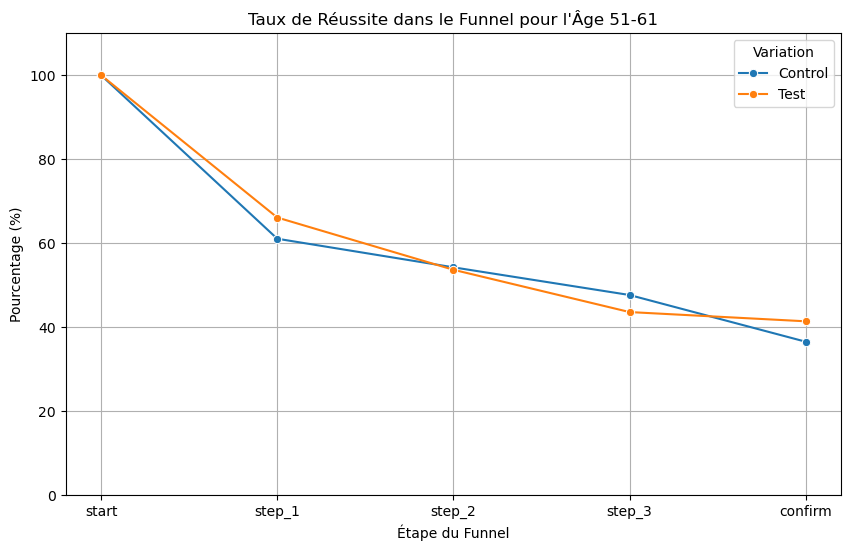

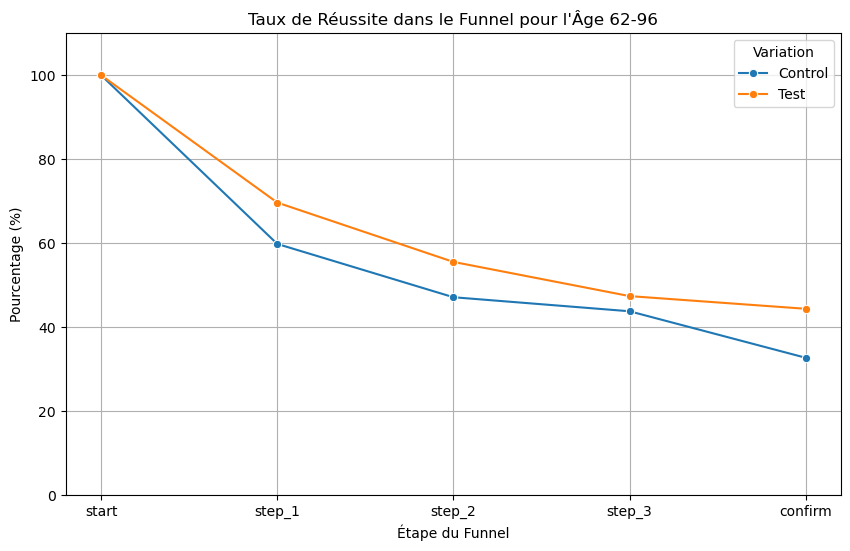

In [8]:

labels_quartiles = ['17-34', '35-50', '51-61', '62-96']


df_all['age_group'] = pd.qcut(
    df_all['clnt_age'],
    q=4,
    labels=labels_quartiles
)

print("Colonnes de df_all :", df_all.columns.tolist())
print("\nRépartition des tranches d'âge :")
print(df_all['age_group'].value_counts())
print("\nNombre de valeurs NaN dans 'age_group' :", df_all['age_group'].isnull().sum())


crosstab_age = pd.crosstab([df_all["age_group"], df_all["Variation"]], df_all['process_step'])

print("\nTableau Croisé (crosstab_age) :")
print(crosstab_age.head())


crosstab_percentages = crosstab_age.div(crosstab_age['start'], axis=0) * 100
crosstab_percentages = crosstab_percentages.round(2)

print("\nPourcentages de Réussite dans le Funnel :")
print(crosstab_percentages.head())


crosstab_percentages_reset = crosstab_percentages.reset_index()


print("\nColonnes de crosstab_percentages_reset :", crosstab_percentages_reset.columns.tolist())
print("\nAperçu de crosstab_percentages_reset :")
print(crosstab_percentages_reset.head())


steps_order = ['start', 'step_1', 'step_2', 'step_3', 'confirm']


for age_group in labels_quartiles:
    plt.figure(figsize=(10, 6))

    subset = crosstab_percentages_reset[crosstab_percentages_reset['age_group'] == age_group]
    if subset.empty:
        print(f"Aucune donnée pour la tranche d'âge {age_group}.")
        continue
    
    subset_melted = subset.melt(id_vars=['age_group', 'Variation'], value_vars=steps_order, var_name='process_step', value_name='percentage')
    
    sns.lineplot(
        data=subset_melted,
        x='process_step',
        y='percentage',
        hue='Variation',
        marker='o'
    )
    
    plt.title(f'Taux de Réussite dans le Funnel pour l\'Âge {age_group}')
    plt.xlabel('Étape du Funnel')
    plt.ylabel('Pourcentage (%)')
    plt.ylim(0, 110)
    plt.grid(True)
    plt.legend(title='Variation')
    plt.show()
